In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.decomposition import PCA

In [8]:
dfg = pd.read_csv('wat-r6-good.csv')
dfm = pd.read_csv('wat-r6-mals.csv')

In [9]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,35,3,2,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,20,26,1,1,1
1,249,0,3,0x1a180,0,0,3,2,8,0,0,22,6,233,2,5,8,1,1,1
2,257,3,0,0x1a180,1,0,3,2,8,22,6,18,2,253,2,4,8,1,1,1
3,305,0,3,0x1a180,2,0,3,2,8,18,2,22,6,294,2,17,23,2,2,1
4,376,3,2,0xeadc0,1,0,3,2,8,23,7,18,2,368,3,2,23,1,2,1


In [10]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,35,3,2,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,47,59,1,1,0
1,243,1,3,0xecf80,0,0,3,2,8,1,1,30,14,231,4,23,28,1,1,0
2,249,0,3,0x1a180,0,0,3,2,8,0,0,22,6,233,5,20,28,2,2,0
3,257,3,0,0x1a180,1,0,3,2,8,22,6,18,2,253,5,18,28,1,2,0
4,305,0,3,0x1a180,2,0,3,2,8,18,2,22,6,294,5,27,40,2,2,0


In [11]:
df = dfg.append(dfm, ignore_index=True)

In [12]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,35,3,2,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,20,26,1,1,1
1,249,0,3,0x1a180,0,0,3,2,8,0,0,22,6,233,2,5,8,1,1,1
2,257,3,0,0x1a180,1,0,3,2,8,22,6,18,2,253,2,4,8,1,1,1
3,305,0,3,0x1a180,2,0,3,2,8,18,2,22,6,294,2,17,23,2,2,1
4,376,3,2,0xeadc0,1,0,3,2,8,23,7,18,2,368,3,2,23,1,2,1


In [13]:
df = df.sort_values('time')

In [14]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,35,3,2,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,20,26,1,1,1
12711,35,3,2,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,47,59,1,1,0
12712,243,1,3,0xecf80,0,0,3,2,8,1,1,30,14,231,4,23,28,1,1,0
12713,249,0,3,0x1a180,0,0,3,2,8,0,0,22,6,233,5,20,28,2,2,0
1,249,0,3,0x1a180,0,0,3,2,8,0,0,22,6,233,2,5,8,1,1,1
12714,257,3,0,0x1a180,1,0,3,2,8,22,6,18,2,253,5,18,28,1,2,0
2,257,3,0,0x1a180,1,0,3,2,8,22,6,18,2,253,2,4,8,1,1,1
12715,305,0,3,0x1a180,2,0,3,2,8,18,2,22,6,294,5,27,40,2,2,0
3,305,0,3,0x1a180,2,0,3,2,8,18,2,22,6,294,2,17,23,2,2,1
4,376,3,2,0xeadc0,1,0,3,2,8,23,7,18,2,368,3,2,23,1,2,1


In [15]:
df.to_csv('wat-r6-pkt.csv',index=False)

In [16]:
df = pd.read_csv("wat-r6-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,35,3,2,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,20,26,1,1,1
1,35,3,2,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,47,59,1,1,0
2,243,1,3,0xecf80,0,0,3,2,8,1,1,30,14,231,4,23,28,1,1,0
3,249,0,3,0x1a180,0,0,3,2,8,0,0,22,6,233,5,20,28,2,2,0
4,249,0,3,0x1a180,0,0,3,2,8,0,0,22,6,233,2,5,8,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25654,3251216,3,0,0x119580,5,3,1,2,9,22,6,18,2,3251191,10024,27,31,1,1,1
25655,3251223,3,0,0x119580,5,4,2,2,9,22,6,18,2,3251191,10024,25,31,1,1,1
25656,3251224,3,0,0xe1580,1,0,3,2,10,22,6,18,2,3251192,10025,24,31,1,1,1
25657,3251225,4,0,0x119580,6,0,3,2,11,22,6,0,0,3251220,10024,23,31,1,1,1


In [17]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,0.010066,-0.018914,0.046894,0.021011,-0.031183,NaN,0.015649,0.008994,0.010865,-0.018669,-0.017387,1.000000,0.982743,-0.094316,-0.139999,-0.332099,-0.399486,0.083142
outport,0.010066,1.000000,-0.264287,0.388271,-0.037143,0.055150,NaN,0.320539,0.906118,0.908448,-0.727634,-0.753364,0.010069,0.012175,-0.046352,0.051884,-0.042618,0.015234,-0.010063
inport,-0.018914,-0.264287,1.000000,-0.134229,0.053504,-0.079443,NaN,-0.559181,-0.282345,-0.418285,0.307733,0.229349,-0.018917,-0.017644,0.062702,0.023967,-0.053947,-0.122238,-0.005013
packet_type,0.046894,0.388271,-0.134229,1.000000,0.410425,-0.609404,NaN,-0.180154,0.325005,0.345154,-0.377824,-0.320432,0.046900,0.050462,0.055868,-0.019013,0.027446,0.000095,0.003954
flit_id,0.021011,-0.037143,0.053504,0.410425,1.000000,-0.064994,NaN,-0.269883,-0.057902,-0.046412,0.154046,0.053747,0.021005,0.022628,-0.027101,0.045619,0.030069,0.014920,0.004523
flit_type,-0.031183,0.055150,-0.079443,-0.609404,-0.064994,1.000000,NaN,0.400725,0.085974,0.068913,-0.228730,-0.079804,-0.031188,-0.033599,-0.153194,0.046989,-0.047655,0.041601,-0.006715
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.015649,0.320539,-0.559181,-0.180154,-0.269883,0.400725,NaN,1.000000,0.274457,0.319767,-0.399613,-0.266831,0.015650,0.015559,-0.118556,-0.024027,0.003138,0.087921,-0.001424
src_ni,0.008994,0.906118,-0.282345,0.325005,-0.057902,0.085974,NaN,0.274457,1.000000,0.964720,-0.751292,-0.883559,0.008999,0.010749,-0.082434,0.004862,-0.012625,0.037344,-0.015365
src_router,0.010865,0.908448,-0.418285,0.345154,-0.046412,0.068913,NaN,0.319767,0.964720,1.000000,-0.753356,-0.852370,0.010869,0.012558,-0.068714,0.040424,0.000807,0.049858,-0.014463


In [18]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [19]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,3,2,1,0,3,2,8,18,2,27,0,1,1
1,3,2,1,0,3,2,8,18,2,27,0,1,1
2,1,3,0,0,3,2,8,30,14,231,4,1,1
3,0,3,0,0,3,2,8,22,6,233,5,2,2
4,0,3,0,0,3,2,8,22,6,233,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25654,3,0,5,3,1,2,9,18,2,3251191,10024,1,1
25655,3,0,5,4,2,2,9,18,2,3251191,10024,1,1
25656,3,0,1,0,3,2,10,18,2,3251192,10025,1,1
25657,4,0,6,0,3,2,11,0,0,3251220,10024,1,1


In [20]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.75,0.50,0.166667,0.00,1.000000,0.0,0.000000,0.600000,0.142857,0.000000,0.000000,0.000000,0.000000
1,0.75,0.50,0.166667,0.00,1.000000,0.0,0.000000,0.600000,0.142857,0.000000,0.000000,0.000000,0.000000
2,0.25,0.75,0.000000,0.00,1.000000,0.0,0.000000,1.000000,1.000000,0.000063,0.000388,0.000000,0.000000
3,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.733333,0.428571,0.000063,0.000486,0.055556,0.055556
4,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.733333,0.428571,0.000063,0.000194,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25654,0.75,0.00,0.833333,0.75,0.333333,0.0,0.333333,0.600000,0.142857,0.999979,0.973393,0.000000,0.000000
25655,0.75,0.00,0.833333,1.00,0.666667,0.0,0.333333,0.600000,0.142857,0.999979,0.973393,0.000000,0.000000
25656,0.75,0.00,0.166667,0.00,1.000000,0.0,0.666667,0.600000,0.142857,0.999979,0.973490,0.000000,0.000000
25657,1.00,0.00,1.000000,0.00,1.000000,0.0,1.000000,0.000000,0.000000,0.999988,0.973393,0.000000,0.000000


In [21]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.264287,0.388271,-0.037143,0.055150,NaN,0.320539,-0.727634,-0.753364,0.010069,0.012175,-0.042618,0.015234,-0.010063
1,-0.264287,1.000000,-0.134229,0.053504,-0.079443,NaN,-0.559181,0.307733,0.229349,-0.018917,-0.017644,-0.053947,-0.122238,-0.005013
2,0.388271,-0.134229,1.000000,0.410425,-0.609404,NaN,-0.180154,-0.377824,-0.320432,0.046900,0.050462,0.027446,0.000095,0.003954
3,-0.037143,0.053504,0.410425,1.000000,-0.064994,NaN,-0.269883,0.154046,0.053747,0.021005,0.022628,0.030069,0.014920,0.004523
4,0.055150,-0.079443,-0.609404,-0.064994,1.000000,NaN,0.400725,-0.228730,-0.079804,-0.031188,-0.033599,-0.047655,0.041601,-0.006715
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.320539,-0.559181,-0.180154,-0.269883,0.400725,NaN,1.000000,-0.399613,-0.266831,0.015650,0.015559,0.003138,0.087921,-0.001424
7,-0.727634,0.307733,-0.377824,0.154046,-0.228730,NaN,-0.399613,1.000000,0.862585,-0.018673,-0.022023,-0.001147,-0.059756,0.011512
8,-0.753364,0.229349,-0.320432,0.053747,-0.079804,NaN,-0.266831,0.862585,1.000000,-0.017391,-0.021757,-0.028437,-0.059706,0.016469
9,0.010069,-0.018917,0.046900,0.021005,-0.031188,NaN,0.015650,-0.018673,-0.017391,1.000000,0.982743,-0.332099,-0.399486,0.083142


In [22]:
train_Y = df['target']

In [23]:
train_Y

0        1
1        0
2        0
3        0
4        1
        ..
25654    1
25655    1
25656    1
25657    1
25658    1
Name: target, Length: 25659, dtype: int64

In [24]:
pca = PCA(0.95)

In [25]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
principal_components = pca.transform(train_X)
principal_components

array([[ 0.29254071,  0.9985016 , -0.09459518, ..., -0.23020904,
        -0.16100622,  0.39707452],
       [ 0.29254071,  0.9985016 , -0.09459518, ..., -0.23020904,
        -0.16100622,  0.39707452],
       [-0.72442758,  1.12081485,  0.12246412, ..., -0.02742787,
         0.11151613,  0.318523  ],
       ...,
       [ 0.7361558 ,  0.21407544,  1.05656279, ...,  0.34904548,
        -0.01760487,  0.11983076],
       [ 1.41241847, -0.05639818,  0.75129508, ...,  0.37446187,
         0.17144877, -0.32785222],
       [-0.28218776,  0.03347502,  0.96132303, ..., -0.18854212,
        -0.38368218, -0.02271854]])

In [27]:
pca.explained_variance_ratio_

array([0.26876518, 0.21332704, 0.19747521, 0.12840122, 0.10123683,
       0.02979002, 0.02395911])

In [28]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

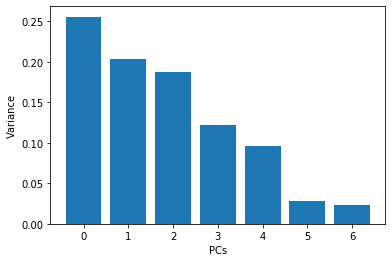

In [29]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [30]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,0.292541,0.998502,-0.094595,0.068400,-0.230209,-0.161006,0.397075
1,0.292541,0.998502,-0.094595,0.068400,-0.230209,-0.161006,0.397075
2,-0.724428,1.120815,0.122464,0.112147,-0.027428,0.111516,0.318523
3,-0.432470,1.114234,0.076086,0.098288,-0.191695,-0.402722,0.040224
4,-0.433057,1.108665,0.082474,0.097387,-0.194947,-0.395010,0.046734
...,...,...,...,...,...,...,...
25654,0.591129,-0.686640,0.224096,0.249002,0.520564,-0.061965,0.089114
25655,0.602895,-0.663531,0.234698,0.644547,0.441428,-0.070617,0.110857
25656,0.736156,0.214075,1.056563,0.229929,0.349045,-0.017605,0.119831
25657,1.412418,-0.056398,0.751295,0.147019,0.374462,0.171449,-0.327852


In [31]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,target
0,0.292541,0.998502,-0.094595,0.068400,-0.230209,-0.161006,0.397075,1
1,0.292541,0.998502,-0.094595,0.068400,-0.230209,-0.161006,0.397075,0
2,-0.724428,1.120815,0.122464,0.112147,-0.027428,0.111516,0.318523,0
3,-0.432470,1.114234,0.076086,0.098288,-0.191695,-0.402722,0.040224,0
4,-0.433057,1.108665,0.082474,0.097387,-0.194947,-0.395010,0.046734,1
...,...,...,...,...,...,...,...,...
25654,0.591129,-0.686640,0.224096,0.249002,0.520564,-0.061965,0.089114,1
25655,0.602895,-0.663531,0.234698,0.644547,0.441428,-0.070617,0.110857,1
25656,0.736156,0.214075,1.056563,0.229929,0.349045,-0.017605,0.119831,1
25657,1.412418,-0.056398,0.751295,0.147019,0.374462,0.171449,-0.327852,1


In [32]:
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,-1.149399e-15,-1.881373e-15,-3.822379e-16,-2.177528e-15,-8.330889e-15,-3.387965e-15,-0.009247
1,-1.149399e-15,1.000000e+00,-1.390464e-15,1.267409e-16,1.497332e-16,-1.271229e-15,1.417177e-15,-0.029654
2,-1.881373e-15,-1.390464e-15,1.000000e+00,4.144248e-17,1.548053e-16,-8.504518e-17,1.052362e-15,0.027342
3,-3.822379e-16,1.267409e-16,4.144248e-17,1.000000e+00,-4.053797e-16,-6.594405e-16,2.140403e-16,0.000545
4,-2.177528e-15,1.497332e-16,1.548053e-16,-4.053797e-16,1.000000e+00,-1.713107e-16,8.857998e-16,0.011461
5,-8.330889e-15,-1.271229e-15,-8.504518e-17,-6.594405e-16,-1.713107e-16,1.000000e+00,-4.699913e-15,0.014683
6,-3.387965e-15,1.417177e-15,1.052362e-15,2.140403e-16,8.857998e-16,-4.699913e-15,1.000000e+00,0.011014
target,-9.247229e-03,-2.965423e-02,2.734190e-02,5.446791e-04,1.146102e-02,1.468333e-02,1.101354e-02,1.000000


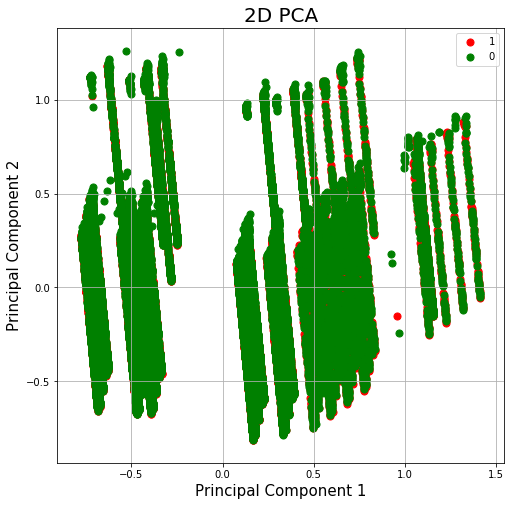

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [34]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,3,2,1,0,3,2,8,23,7,18,2,27,0,20,26,1,1,1
1,3,2,1,0,3,2,8,23,7,18,2,27,0,47,59,1,1,0
2,1,3,0,0,3,2,8,1,1,30,14,231,4,23,28,1,1,0
3,0,3,0,0,3,2,8,0,0,22,6,233,5,20,28,2,2,0
4,0,3,0,0,3,2,8,0,0,22,6,233,2,5,8,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25654,3,0,5,3,1,2,9,22,6,18,2,3251191,10024,27,31,1,1,1
25655,3,0,5,4,2,2,9,22,6,18,2,3251191,10024,25,31,1,1,1
25656,3,0,1,0,3,2,10,22,6,18,2,3251192,10025,24,31,1,1,1
25657,4,0,6,0,3,2,11,22,6,0,0,3251220,10024,23,31,1,1,1


In [35]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [36]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [37]:
seed = 7
np.random.seed(seed)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [39]:
model = Sequential()

In [40]:
n_cols = train_X.shape[1]
n_cols

13

In [41]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [43]:
model.fit(x_train, y_train, epochs=50, validation_split=0.4)

Train on 10468 samples, validate on 6980 samples
Epoch 1/50
10468/10468 [==============================] - 2s 165us/step - loss: 0.2500 - accuracy: 0.5080 - val_loss: 0.2499 - val_accuracy: 0.4968
Epoch 2/50
10468/10468 [==============================] - 1s 96us/step - loss: 0.2498 - accuracy: 0.5061 - val_loss: 0.2498 - val_accuracy: 0.5013
Epoch 3/50
10468/10468 [==============================] - 1s 90us/step - loss: 0.2496 - accuracy: 0.5054 - val_loss: 0.2497 - val_accuracy: 0.5040
Epoch 4/50
10468/10468 [==============================] - 1s 97us/step - loss: 0.2495 - accuracy: 0.5102 - val_loss: 0.2496 - val_accuracy: 0.5052
Epoch 5/50
10468/10468 [==============================] - 1s 98us/step - loss: 0.2493 - accuracy: 0.5127 - val_loss: 0.2495 - val_accuracy: 0.5057
Epoch 6/50
10468/10468 [==============================] - 1s 92us/step - loss: 0.2491 - accuracy: 0.5145 - val_loss: 0.2493 - val_accuracy: 0.5095
Epoch 7/50
10468/10468 [==============================] - 1s 97us/st

In [44]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [45]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.31%


In [46]:
dff = pd.read_csv('wat-r6-pkt.csv',nrows=500)

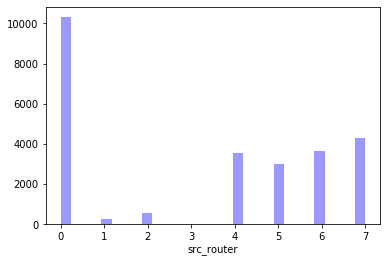

In [47]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

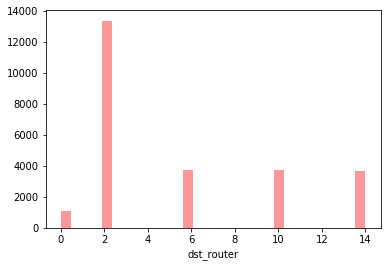

In [48]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

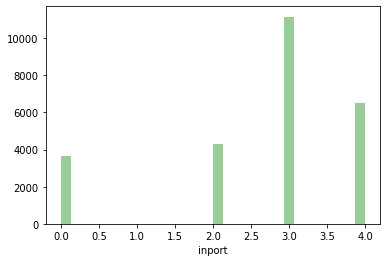

In [49]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

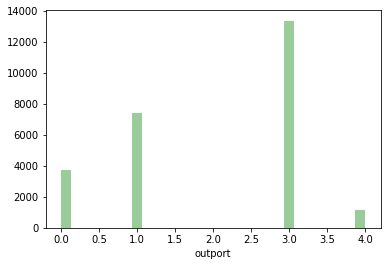

In [50]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

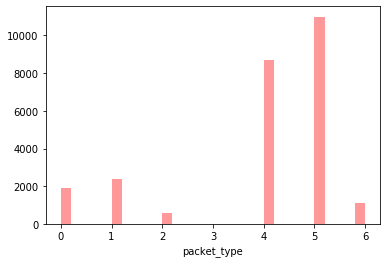

In [51]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')